In [73]:
import StandardScaler
import pandas as pd
import kagglehub
import plt
import seaborn as sns
from kagglehub import KaggleDatasetAdapter

ImportError: dask.distributed is not installed.

Please either conda or pip install distributed:

  conda install dask distributed             # either conda install
  python -m pip install "dask[distributed]" --upgrade    # or pip install

In [65]:
# Download latest version
path = kagglehub.dataset_download("amitvkulkarni/lifestyle-factors-influencing-osteoporosis")

print("Path to dataset files:", path)

NameError: name 'kagglehub' is not defined

In [67]:
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "amitvkulkarni/lifestyle-factors-influencing-osteoporosis",
  "osteoporosis.csv",)

df.head()

NameError: name 'kagglehub' is not defined

In [ ]:
data = pd.DataFrame(columns=['patient ID', 'Age', 'Gender', 'Hormonal changes', 'Family history', 'Race/Ethnicity', 'Body weight', 'Calcium intake', 'Vitamin D Intake', 'Physical activity'])

EDA - Exploratory Data Analysis

In [11]:
data = data.drop(columns=['patient'])

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

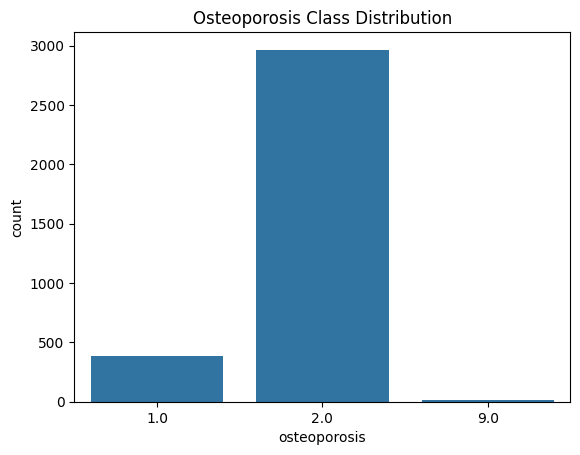

osteoporosis
2.0    2965
1.0     384
9.0      12
Name: count, dtype: int64


In [13]:
sns.countplot(x=data['osteoporosis'])
plt.title("Osteoporosis Class Distribution")
plt.show()

print(data['osteoporosis'].value_counts())

- Balancing needed

In [14]:
data = data[data['osteoporosis'] != 9]

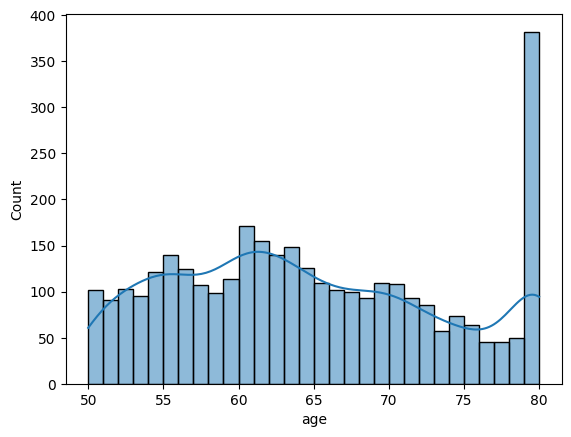

In [15]:
sns.histplot(data['age'], bins=30, kde=True)
plt.show()

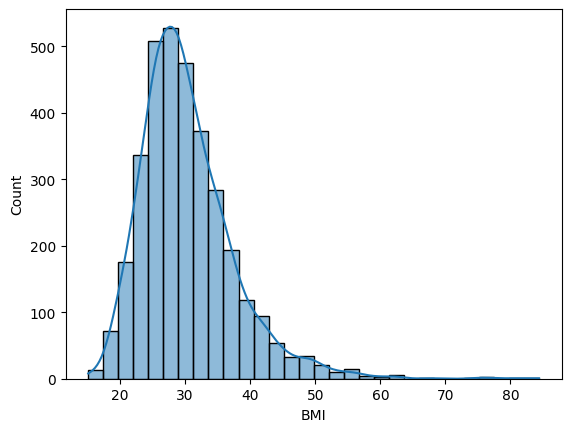

In [16]:
sns.histplot(data['BMI'], bins=30, kde=True)
plt.show()

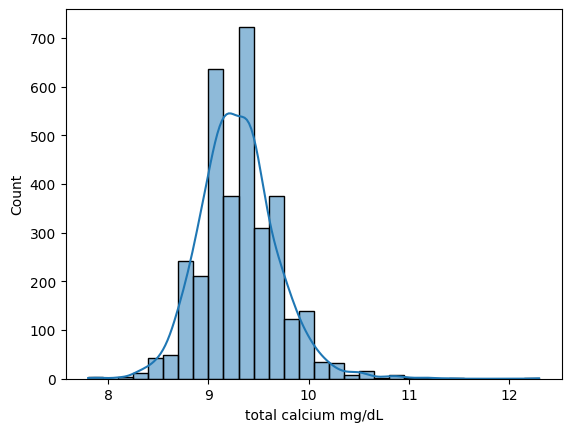

In [17]:
sns.histplot(data['total calcium mg/dL'], bins=30, kde=True)
plt.show()

Osteoporosis vs Age

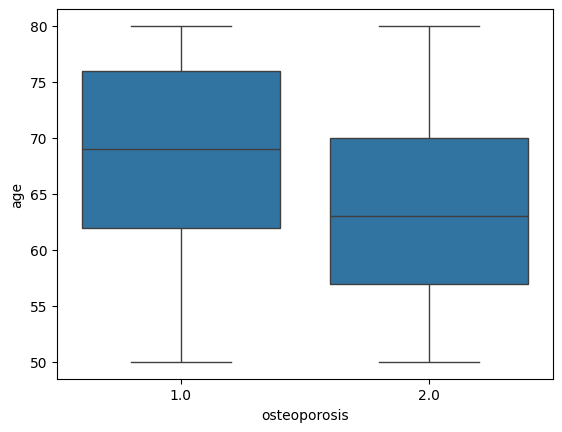

In [18]:
sns.boxplot(x=data['osteoporosis'], y=data['age'])
plt.show()

People with osteoporosis are older, controls are younger - strong predictor

Osteoporosis vs  Calcium

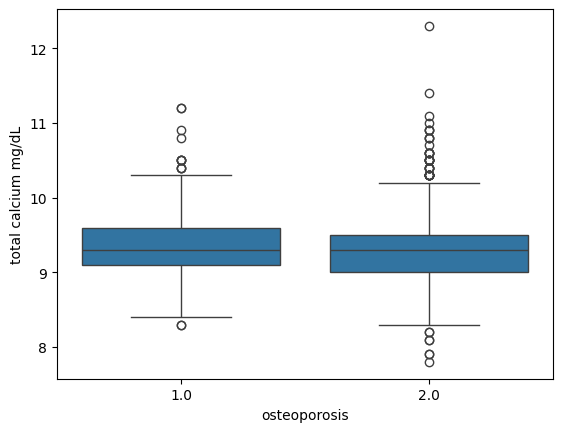

In [19]:
sns.boxplot(x=data['osteoporosis'], y=data['total calcium mg/dL'])
plt.show()

Calcium levels are similar - not a strong predictor

Osteoporosis vs BMI

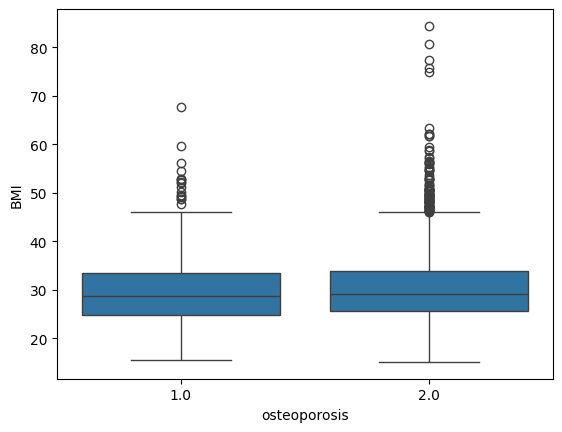

In [20]:
sns.boxplot(x=data['osteoporosis'], y=data['BMI'])
plt.show()

BMI differences are small - not a strong predictor

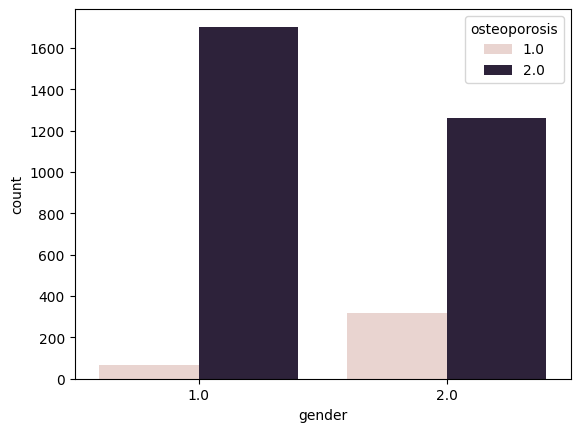

In [21]:
sns.countplot(x=data['gender'], hue=data['osteoporosis'])
plt.show()

Osteoporosis in females is much more common - strong predictor

Dealing with missing values

In [22]:
def check_nan(df):
    nan_columns = df.columns[df.isna().any()].tolist()
    return nan_columns

check_nan(data)

['menopause',
 'age of last period',
 'female HRT',
 'avg alcohol/day past 12 mos',
 'cigarettes smoked',
 'regular smoking age',
 'physical work (min)',
 'vigorous exercise (min)',
 'moderate exercise (min)',
 'sedentary (min)',
 'walk/bike (min)',
 'mother osteoporosis',
 'father osteoporosis']

In [23]:
numeric_cols = [
    'age',
    'weight',
    'height',
    'BMI',
    'vit.D intake',
    'calcium intake',
    'total calcium mg/dL',
    'avg alcohol/day past 12 mos',
    'cigarettes smoked',
    'regular smoking age',
    'physical work (min)',
    'vigorous exercise (min)',
    'moderate exercise (min)',
    'sedentary (min)',
    'walk/bike (min)',
    'age of last period'
]

categorical_cols = [
    'gender',
    'ethnicity',
    'alcohol past 12 mos',
    'menopause',
    'female HRT',
    'mother osteoporosis',
    'father osteoporosis'
]

numeric_cols = [c for c in numeric_cols if c in data.columns]
categorical_cols = [c for c in categorical_cols if c in data.columns]

print("shape numeric subset:", data[numeric_cols].shape)
print("shape categorical subset:", data[categorical_cols].shape)

shape numeric subset: (3349, 16)
shape categorical subset: (3349, 7)


In [24]:
for col in numeric_cols + categorical_cols:
    if col in data.columns:
        data[col + '_was_missing'] = data[col].isna()

data.head()

,osteoporosis,age,gender,ethnicity,weight,height,BMI,menopause,age of last period,female HRT,...,sedentary (min)_was_missing,walk/bike (min)_was_missing,age of last period_was_missing,gender_was_missing,ethnicity_was_missing,alcohol past 12 mos_was_missing,menopause_was_missing,female HRT_was_missing,mother osteoporosis_was_missing,father osteoporosis_was_missing
11,2.0,68.0,1.0,7.0,103.7,185.3,30.2,NaN,NaN,NaN,...,False,False,True,False,False,False,True,True,True,True
19,2.0,76.0,1.0,3.0,83.3,177.1,26.6,NaN,NaN,NaN,...,False,True,True,False,False,False,True,True,True,True
27,2.0,68.0,2.0,4.0,73.0,161.2,28.1,7.0,45.0,2.0,...,False,False,False,False,False,False,False,False,True,True
35,2.0,68.0,1.0,3.0,90.2,162.5,34.2,NaN,NaN,NaN,...,False,True,True,False,False,False,True,True,False,True
37,2.0,54.0,2.0,6.0,62.0,144.7,29.6,3.0,50.0,2.0,...,False,True,False,False,False,False,False,False,True,True


In [25]:
data.drop(columns=['cigarettes smoked'], inplace=True)
numeric_cols.remove('cigarettes smoked')

In [26]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='median')

num_imputer = SimpleImputer(strategy='median')
data[numeric_cols] = num_imputer.fit_transform(data[numeric_cols])
data[numeric_cols]

,age,weight,height,BMI,vit.D intake,calcium intake,total calcium mg/dL,avg alcohol/day past 12 mos,regular smoking age,physical work (min),vigorous exercise (min),moderate exercise (min),sedentary (min),walk/bike (min),age of last period
11,68.0,103.7,185.3,30.2,4.6,1309.0,9.1,2.0,17.5,480.0,60.0,60.0,300.0,60.0,48.0
19,76.0,83.3,177.1,26.6,0.9,770.0,9.1,2.0,18.0,120.0,60.0,45.0,900.0,30.0,48.0
27,68.0,73.0,161.2,28.1,4.1,409.0,9.9,2.0,17.5,120.0,60.0,90.0,180.0,30.0,45.0
35,68.0,90.2,162.5,34.2,0.4,160.0,9.4,2.0,17.5,120.0,60.0,45.0,120.0,30.0,48.0
37,54.0,62.0,144.7,29.6,0.4,155.0,9.0,2.0,17.5,120.0,60.0,45.0,60.0,30.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15549,62.0,73.0,159.6,28.7,3.1,818.0,8.9,3.0,14.0,120.0,60.0,45.0,240.0,30.0,30.0
15551,64.0,114.3,174.5,37.5,0.3,386.0,9.0,2.0,15.0,120.0,60.0,45.0,300.0,20.0,48.0
15552,52.0,94.3,178.8,29.5,6.4,1488.0,9.6,1.0,27.0,360.0,120.0,120.0,60.0,60.0,48.0
15554,67.0,82.8,147.8,37.9,4.2,355.0,8.8,2.0,17.5,10.0,60.0,45.0,180.0,30.0,47.0


In [27]:
cat_imputer = SimpleImputer(strategy='constant', fill_value=0)

cat_imputed_array = cat_imputer.fit_transform(data[categorical_cols])

cat_imputed = pd.DataFrame(cat_imputed_array,
                           columns=categorical_cols,
                           index=data.index)

data[categorical_cols] = cat_imputed
data[categorical_cols] = data[categorical_cols]
data[categorical_cols]

,gender,ethnicity,alcohol past 12 mos,menopause,female HRT,mother osteoporosis,father osteoporosis
11,1.0,7.0,4.000000e+00,0.0,0.0,0.0,0.0
19,1.0,3.0,5.397605e-79,0.0,0.0,0.0,0.0
27,2.0,4.0,5.397605e-79,7.0,2.0,0.0,0.0
35,1.0,3.0,5.397605e-79,0.0,0.0,1.0,0.0
37,2.0,6.0,5.397605e-79,3.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...
15549,2.0,2.0,6.000000e+00,7.0,2.0,1.0,0.0
15551,1.0,4.0,4.000000e+00,0.0,0.0,0.0,0.0
15552,1.0,4.0,3.000000e+00,0.0,0.0,0.0,0.0
15554,2.0,1.0,3.000000e+00,3.0,2.0,0.0,0.0


In [28]:
from sklearn.utils import resample

minority = data[data['osteoporosis'] == 1]
majority = data[data['osteoporosis'] == 2]

majority_down = resample(
    majority,
    replace=False,
    n_samples=2000,
    random_state=42
)

data_balanced = pd.concat([minority, majority_down])

In [29]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [30]:
X = data_balanced.drop(columns=['osteoporosis'])
y = data_balanced['osteoporosis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [31]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

1st method - Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=500,
    class_weight={1: 5, 2: 1},
    random_state=42
)
model.fit(X_train_res, y_train_res)


,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

for i in indices[:20]:
    print(X.columns[i], importances[i])

menopause 0.10312302760774825
gender 0.08900402300404957
female HRT 0.07751390024706102
age 0.07218230328399727
height 0.06517762376646605
weight 0.04965183534308096
calcium intake 0.045966763947807174
BMI 0.04423612686954864
vit.D intake 0.039645514107682724
age of last period 0.03818983595483803
sedentary (min) 0.03634055619687478
mother osteoporosis 0.03551881218260964
total calcium mg/dL 0.03534950760448938
ethnicity 0.03272778784513118
alcohol past 12 mos 0.03001694597106898
regular smoking age 0.027978405179662425
avg alcohol/day past 12 mos 0.022756698864300033
moderate exercise (min)_was_missing 0.020307075147019897
vigorous exercise (min)_was_missing 0.01929988194380746
moderate exercise (min) 0.01707788162026439


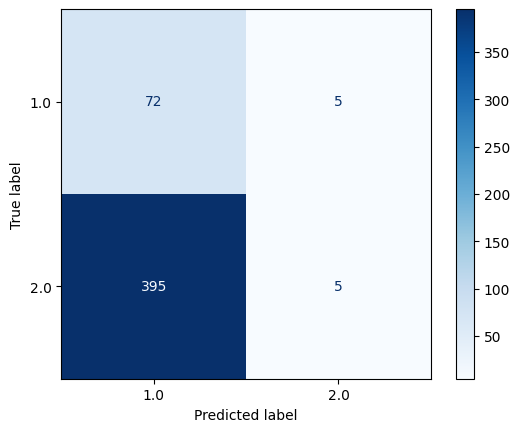

              precision    recall  f1-score   support

         1.0       0.15      0.94      0.26        77
         2.0       0.50      0.01      0.02       400

    accuracy                           0.16       477
   macro avg       0.33      0.47      0.14       477
weighted avg       0.44      0.16      0.06       477



In [34]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

probs = model.predict_proba(X_test)[:, 1]
y_pred_thr = np.where(probs >= 0.35, 1, 2)
cm = confusion_matrix(y_test, y_pred_thr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.show()
print(classification_report(y_test, y_pred_thr))

2nd method - XGBoost Classifier

In [35]:
from xgboost import XGBClassifier

In [36]:
y_train_bin = (y_train_res == 1).astype(int)  # 1 if osteoporosis, else 0
y_test_bin  = (y_test == 1).astype(int)

In [37]:
neg = (y_train_bin == 0).sum()
pos = (y_train_bin == 1).sum()
spw = neg / pos
print("scale_pos_weight =", spw)

scale_pos_weight = 1.0


In [38]:
model_xgb = XGBClassifier(
    n_estimators=400,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    scale_pos_weight=spw,
    random_state=42
)

model_xgb.fit(X_train_res, y_train_bin)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


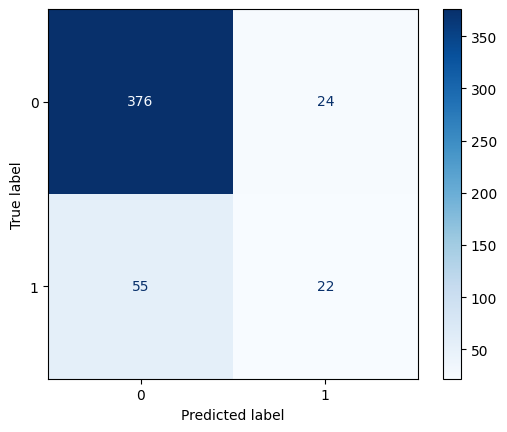

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       400
           1       0.48      0.29      0.36        77

    accuracy                           0.83       477
   macro avg       0.68      0.61      0.63       477
weighted avg       0.81      0.83      0.82       477



In [39]:
y_pred_bin = model_xgb.predict(X_test)

cm = confusion_matrix(y_test_bin, y_pred_bin)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1]) # 0 - no osteoporosis, 1 - osteoporosis
disp.plot(cmap='Blues')
plt.show()
print(classification_report(y_test_bin, y_pred_bin))

In [40]:
probs = model_xgb.predict_proba(X_test)[:, 1]

thresholds = [0.5, 0.45, 0.40, 0.35, 0.30, 0.25, 0.20]

for t in thresholds:
    y_thr = np.where(probs >= t, 1, 0)
    print(f"--- Threshold = {t} ---")
    print(confusion_matrix(y_test_bin, y_thr))
    print(classification_report(y_test_bin, y_thr))

--- Threshold = 0.5 ---
[[376  24]
 [ 55  22]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       400
           1       0.48      0.29      0.36        77

    accuracy                           0.83       477
   macro avg       0.68      0.61      0.63       477
weighted avg       0.81      0.83      0.82       477

--- Threshold = 0.45 ---
[[370  30]
 [ 54  23]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       400
           1       0.43      0.30      0.35        77

    accuracy                           0.82       477
   macro avg       0.65      0.61      0.63       477
weighted avg       0.80      0.82      0.81       477

--- Threshold = 0.4 ---
[[363  37]
 [ 49  28]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       400
           1       0.43      0.36      0.39        77

    accuracy                           0

The optimal threshold for the XGBoost classifier was 0.20

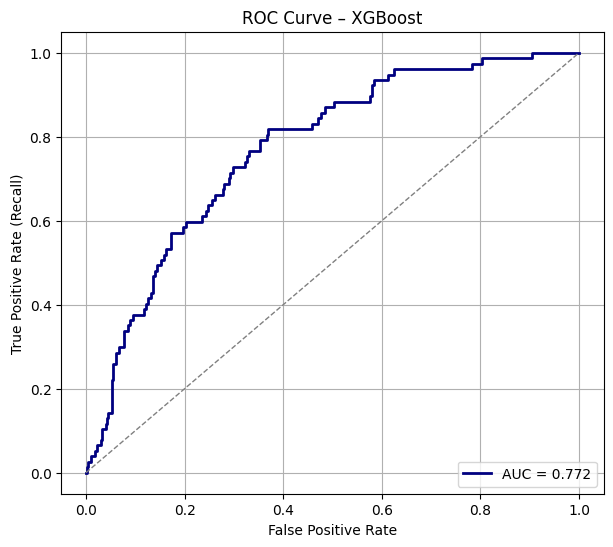

In [41]:
from sklearn.metrics import roc_curve, auc

probs = model_xgb.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_bin, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color='navy', lw=2, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve – XGBoost')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

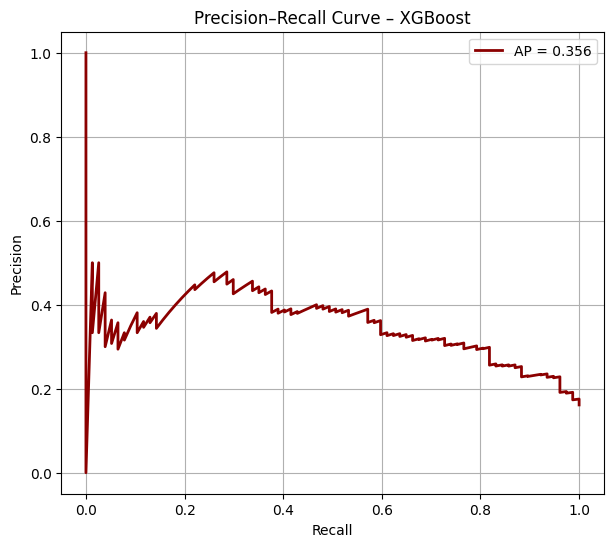

In [42]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test_bin, probs)
ap = average_precision_score(y_test_bin, probs)

plt.figure(figsize=(7,6))
plt.plot(recall, precision, lw=2, color='darkred', label=f'AP = {ap:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve – XGBoost')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

C:\Users\omord\PycharmProjects\OsteoporosisScreening\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


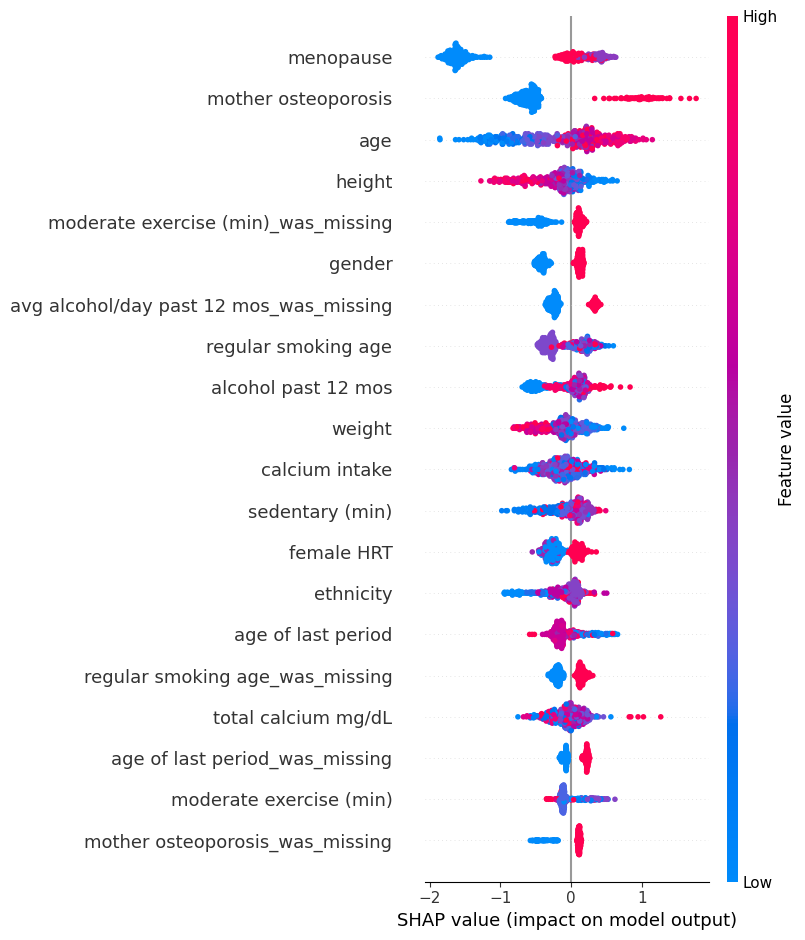

In [43]:
import shap

explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="dot")


In [44]:
df = data.copy()

# converting osteoporosis values to 1/0
df = df[df['osteoporosis'].isin([1,2])]
df['osteoporosis_bin'] = (df['osteoporosis'] == 1).astype(int)

# Dropping patient column
if 'patient' in df.columns:
    df = df.drop(columns=['patient'])

In [45]:
# Minimal required columns check
required = ['age', 'gender', 'weight', 'height', 'BMI', 'vit.D intake', 'calcium intake', 'total calcium mg/dL']
missing_required = [c for c in required if c not in df.columns]
if missing_required:
    raise ValueError("Missing required columns: " + ", ".join(missing_required))

In [46]:
def normalize_gender(g):
    try:
        # numeric codes
        if np.isnan(g): return np.nan
        if int(g) == 1: return 'male'
        if int(g) == 2: return 'female'
    except:
        # already string
        g = str(g).lower()
        if 'male' in g: return 'male'
        if 'female' in g: return 'female'
    return np.nan

df['gender'] = df['gender'].apply(normalize_gender)

In [47]:
def add_features(df_in):
    dfc = df_in.copy()
    # BMI is already present, but ensure numeric
    dfc['BMI'] = pd.to_numeric(dfc['BMI'], errors='coerce')

    # Weight/Height numeric
    dfc['weight'] = pd.to_numeric(dfc['weight'], errors='coerce')
    dfc['height'] = pd.to_numeric(dfc['height'], errors='coerce')

    # Add BMI category
    dfc['bmi_underweight'] = (dfc['BMI'] < 18.5).astype(int)
    dfc['bmi_normal'] = ((dfc['BMI'] >= 18.5) & (dfc['BMI'] < 25)).astype(int)
    dfc['bmi_overweight'] = ((dfc['BMI'] >= 25) & (dfc['BMI'] < 30)).astype(int)
    dfc['bmi_obese'] = (dfc['BMI'] >= 30).astype(int)

    # Age buckets and interaction with menopause (if column exists)
    dfc['age'] = pd.to_numeric(dfc['age'], errors='coerce')
    dfc['age_sq'] = dfc['age'] ** 2
    dfc['age_over_65'] = (dfc['age'] >= 65).astype(int)
    dfc['age_over_75'] = (dfc['age'] >= 75).astype(int)

    # Vitamin D and calcium interactions
    dfc['vitD_x_calcium'] = pd.to_numeric(dfc['vit.D intake'], errors='coerce') * pd.to_numeric(dfc['calcium intake'], errors='coerce')

    # parental history combine
    for col in ['mother osteoporosis', 'father osteoporosis']:
        if col in dfc.columns:
            dfc[col] = dfc[col].replace({9: 0}).fillna(0).astype(int)  # map unknown to 0 (adjust if needed)
    if 'mother osteoporosis' in dfc.columns and 'father osteoporosis' in dfc.columns:
        dfc['parent_osteo_any'] = ((dfc['mother osteoporosis'] == 1) | (dfc['father osteoporosis'] == 1)).astype(int)
    else:
        dfc['parent_osteo_any'] = 0

    # Menopause-related (female only)
    if 'menopause' in dfc.columns:
        dfc['menopause'] = dfc['menopause'].fillna(0).astype(int)
    if 'female HRT' in dfc.columns:
        dfc['female_HRT'] = dfc['female HRT'].fillna(0).astype(int)

    # Smoking/alcohol features
    if 'avg alcohol/day past 12 mos' in dfc.columns:
        dfc['avg_alcohol_per_day'] = pd.to_numeric(dfc['avg alcohol/day past 12 mos'], errors='coerce').fillna(0)

    # activity aggregation (if present)
    act_cols = ['physical work (min)', 'vigorous exercise (min)', 'moderate exercise (min)', 'sedentary (min)', 'walk/bike (min)']
    total_activity = 0
    for c in act_cols:
        if c in dfc.columns:
            dfc[c] = pd.to_numeric(dfc[c], errors='coerce').fillna(0)
            total_activity += dfc[c]
    dfc['total_activity_min'] = total_activity

    return dfc

In [48]:
df = add_features(df)

In [62]:

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import joblib
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    RandomizedSearchCV
)
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score
)



def train_gender_model(df, gender_label, save_prefix=None, random_state=42):
    """
    Trains two candidate models (RandomForest, XGBoost) for the specified gender.
    Returns fitted best estimator and a report dict.
    """

    # Filter for gender
    df_g = df[df['gender'] == gender_label].copy()
    if df_g.shape[0] < 100:
        print(f"Warning: small dataset for gender={gender_label}: n={df_g.shape[0]}")

    # Features to consider (numeric + categorical)
    # Keep a robust subset based on columns present
    feature_candidates = [
        'age', 'age_sq', 'age_over_65', 'age_over_75', 'weight', 'height', 'BMI',
        'bmi_underweight', 'bmi_normal', 'bmi_overweight', 'bmi_obese',
        'vit.D intake', 'calcium intake', 'total calcium mg/dL', 'vitD_x_calcium',
        'avg_alcohol_per_day', 'total_activity_min',
        'parent_osteo_any'
    ]
    female_only = ['menopause', 'female_HRT', 'age of last period']

    if gender_label == 'female':
        feature_candidates.extend([c for c in female_only if c in df_g.columns])
    else:
        # Ensure female-only columns are removed if they exist
        df_g = df_g.drop(columns=[c for c in female_only if c in df_g.columns], errors='ignore')

    
    # feature_candidates = [
    #     'age', 'age_sq', 'age_over_65', 'age_over_75', 'weight', 'height', 'BMI',
    #     'bmi_underweight', 'bmi_normal', 'bmi_overweight', 'bmi_obese',
    #     'vit.D intake', 'calcium intake', 'total calcium mg/dL', 'vitD_x_calcium',
    #     'avg_alcohol_per_day', 'total_activity_min',
    #     'parent_osteo_any'
    # ]
    # # menopause/HRT only useful for females
    # if gender_label == 'female':
    #     if 'menopause' in df_g.columns:
    #         feature_candidates.append('menopause')
    #     if 'female_HRT' in df_g.columns:
    #         feature_candidates.append('female_HRT')
    #     if 'age of last period' in df_g.columns:
    #         feature_candidates.append('age of last period')

    # add ethnicity (categorical)
    if 'ethnicity' in df_g.columns:
        feature_candidates.append('ethnicity')

    # Filter features to those actually present
    X = df_g[ [c for c in feature_candidates if c in df_g.columns] ].copy()
    y = df_g['osteoporosis_bin'].astype(int)

    # Train/val split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                        stratify=y, random_state=random_state)

    # Basic column lists
    numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = [c for c in X_train.columns if c not in numeric_cols]

    # Imputation / scaling / encoding
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_cols),
            ('cat', categorical_transformer, categorical_cols)
        ],
        remainder='drop'
    )

    # We'll build an imbalanced-learn pipeline with SMOTE applied AFTER train-test split (inside CV we must be careful)
    # For hyperparameter search we wrap preprocessor + classifier in ImbPipeline and use RandomizedSearchCV with StratifiedKFold
    # Candidate estimators
    rf = RandomForestClassifier(n_jobs=-1, random_state=random_state, class_weight=None)  # we handle imbalance via SMOTE
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_jobs=-1, random_state=random_state)

    # Parameter distributions for randomized search (kept moderate)
    rf_param_dist = {
        'clf__n_estimators': [200, 400, 600],
        'clf__max_depth': [4,6,8,12, None],
        'clf__min_samples_split': [2,4,8],
        'clf__min_samples_leaf': [1,2,4],
        'clf__max_features': ['sqrt', 'log2', 0.7]
    }

    xgb_param_dist = {
        'clf__n_estimators': [200, 400, 600],
        'clf__max_depth': [3,4,5,6,8],
        'clf__learning_rate': [0.01, 0.03, 0.05, 0.1],
        'clf__subsample': [0.6, 0.8, 1.0],
        'clf__colsample_bytree': [0.6, 0.8, 1.0],
        'clf__gamma': [0, 0.1, 0.2]
    }

    # Pipelines (with SMOTE inside pipeline)
    rf_pipe = ImbPipeline(steps=[
        ('preproc', preprocessor),
        ('smote', SMOTE(random_state=random_state)),
        ('clf', rf)
    ])

    xgb_pipe = ImbPipeline(steps=[
        ('preproc', preprocessor),
        ('smote', SMOTE(random_state=random_state)),
        ('clf', xgb)
    ])

    # RandomizedSearchCV setup
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    n_iter = 30  # adjust for compute budget

    rs_rf = RandomizedSearchCV(
        rf_pipe, rf_param_dist, n_iter=n_iter, scoring='average_precision', cv=cv, verbose=1, n_jobs=-1, random_state=random_state
    )
    rs_xgb = RandomizedSearchCV(
        xgb_pipe, xgb_param_dist, n_iter=n_iter, scoring='average_precision', cv=cv, verbose=1, n_jobs=-1, random_state=random_state
    )

    # Fit both searches (may take time)
    print(f"Training RandomizedSearchCV for gender={gender_label} (RandomForest)...")
    rs_rf.fit(X_train, y_train)
    print(f"Best RF params: {rs_rf.best_params_}, best AP: {rs_rf.best_score_:.3f}")

    print(f"Training RandomizedSearchCV for gender={gender_label} (XGBoost)...")
    rs_xgb.fit(X_train, y_train)
    print(f"Best XGB params: {rs_xgb.best_params_}, best AP: {rs_xgb.best_score_:.3f}")

    # Evaluate both on test set using predicted probabilities
    def evaluate_model(est, X_t, y_t, label):
        probs = est.predict_proba(X_t)[:, 1]
        auc = roc_auc_score(y_t, probs)
        ap = average_precision_score(y_t, probs)
        print(f"== {label} evaluation on test set: AUC={auc:.3f}, AP={ap:.3f} ==")
        # ROC and PR curves
        fpr, tpr, _ = roc_curve(y_t, probs)
        precision, recall, pr_thresh = precision_recall_curve(y_t, probs)
        return {'probs': probs, 'auc': auc, 'ap': ap, 'fpr': fpr, 'tpr': tpr, 'precision': precision, 'recall': recall, 'pr_thresh': pr_thresh}

    rf_res = evaluate_model(rs_rf.best_estimator_, X_test, y_test, 'RandomForest')
    xgb_res = evaluate_model(rs_xgb.best_estimator_, X_test, y_test, 'XGBoost')

    # Choose best by AP (average precision) or AUC
    best_estimator = rs_xgb.best_estimator_ if xgb_res['ap'] >= rf_res['ap'] else rs_rf.best_estimator_
    best_name = 'XGBoost' if xgb_res['ap'] >= rf_res['ap'] else 'RandomForest'
    print(f"Selected best: {best_name}")

    # Calibration / threshold tuning: find threshold that maximizes F1 on validation (we can use test here but ideally use CV)
    probs = best_estimator.predict_proba(X_test)[:, 1]
    from sklearn.metrics import f1_score
    precisions, recalls, thresholds = precision_recall_curve(y_test, probs)
    # compute F1 for thresholds
    f1_scores = []
    ths = np.append(thresholds, 1.0)  # thresholds array is shorter than precisions/recalls
    for t in ths:
        preds = (probs >= t).astype(int)
        f1_scores.append(f1_score(y_test, preds))
    best_idx = np.nanargmax(f1_scores)
    best_threshold = ths[best_idx]
    print(f"Best threshold by F1 on test: {best_threshold:.3f}, F1={f1_scores[best_idx]:.3f}")

    # Final classification report at selected threshold
    final_preds = (probs >= best_threshold).astype(int)
    print("Classification report at selected threshold:")
    print(classification_report(y_test, final_preds))

    # Confusion matrix
    cm = confusion_matrix(y_test, final_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion matrix ({gender_label}) - {best_name} at thr={best_threshold:.2f}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC & PR plots
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.plot(fpr, tpr, label=f'AUC={roc_auc_score(y_test, probs):.3f}')
    plt.plot([0,1], [0,1], '--', color='gray')
    plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title(f'ROC ({gender_label})'); plt.legend()

    plt.subplot(1,2,2)
    precision, recall, _ = precision_recall_curve(y_test, probs)
    plt.plot(recall, precision, label=f'AP={average_precision_score(y_test, probs):.3f}')
    plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title(f'Precision-Recall ({gender_label})'); plt.legend()
    plt.show()

    # SHAP explanation (TreeExplainer works for tree models)
    try:
        # Need raw features after preprocessor to compute SHAP; we will compute SHAP values on the transformed features via explainer on the model's internal booster if xgboost.
        # For RandomForest/XGBoost in pipeline: extract classifier and preprocessor for applying shap on test set
        clf = best_estimator.named_steps['clf']
        preproc = best_estimator.named_steps['preproc']
        X_test_trans = preproc.transform(X_test)
        # If classifier is XGB -> use TreeExplainer on booster
        explainer = shap.TreeExplainer(clf)
        shap_values = explainer.shap_values(X_test_trans)
        # Create summary plot (this will open a matplotlib window)
        # But we need feature names after preprocessor
        # Build feature names
        num_features = preproc.transformers_[0][2]  # numeric cols list
        # Get one-hot names
        if len(preproc.transformers_) > 1 and preproc.transformers_[1][0] == 'cat':
            cat_transformer = preproc.transformers_[1][1]
            cat_cols = preproc.transformers_[1][2]
            # get categories_
            try:
                ohe = cat_transformer.named_steps['onehot']
                cat_names = ohe.get_feature_names_out(cat_cols)
            except Exception:
                cat_names = cat_cols
            feature_names = list(num_features) + list(cat_names)
        else:
            feature_names = list(num_features)
        shap.summary_plot(shap_values, features=X_test_trans, feature_names=feature_names, plot_type="dot")
    except Exception as e:
        print("SHAP plotting failed:", e)

    # Save best model pipeline
    if save_prefix:
        joblib.dump(best_estimator, f"{save_prefix}_{gender_label}_best.pkl")
        print(f"Saved best model pipeline to {save_prefix}_{gender_label}_best.pkl")

    report = {
        'gender': gender_label,
        'best_model_name': best_name,
        'best_threshold': float(best_threshold),
        'rf_cv_score': float(rs_rf.best_score_),
        'xgb_cv_score': float(rs_xgb.best_score_),
        'rf_best_params': rs_rf.best_params_,
        'xgb_best_params': rs_xgb.best_params_
    }

    return best_estimator, report


START TRAINING FOR GENDER: MALE
Training RandomizedSearchCV for gender=male (RandomForest)...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best RF params: {'clf__n_estimators': 200, 'clf__min_samples_split': 8, 'clf__min_samples_leaf': 2, 'clf__max_features': 'log2', 'clf__max_depth': 4}, best AP: 0.072
Training RandomizedSearchCV for gender=male (XGBoost)...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\omord\PycharmProjects\OsteoporosisScreening\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [00:41:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGB params: {'clf__subsample': 0.6, 'clf__n_estimators': 600, 'clf__max_depth': 4, 'clf__learning_rate': 0.03, 'clf__gamma': 0.1, 'clf__colsample_bytree': 0.6}, best AP: 0.077
== RandomForest evaluation on test set: AUC=0.595, AP=0.072 ==
== XGBoost evaluation on test set: AUC=0.610, AP=0.061 ==
Selected best: RandomForest
Best threshold by F1 on test: 0.573, F1=0.162
Classification report at selected threshold:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       341
           1       0.12      0.23      0.16        13

    accuracy                           0.91       354
   macro avg       0.55      0.58      0.56       354
weighted avg       0.94      0.91      0.92       354



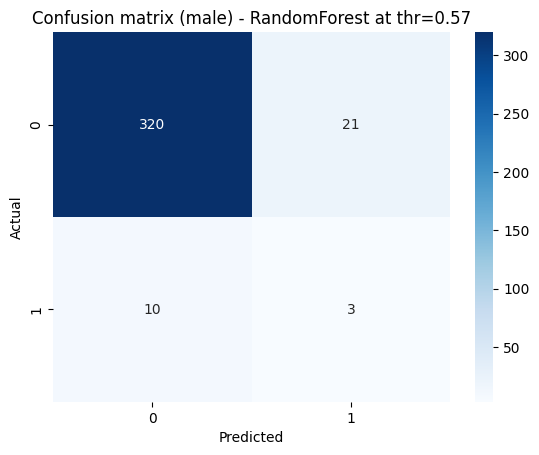

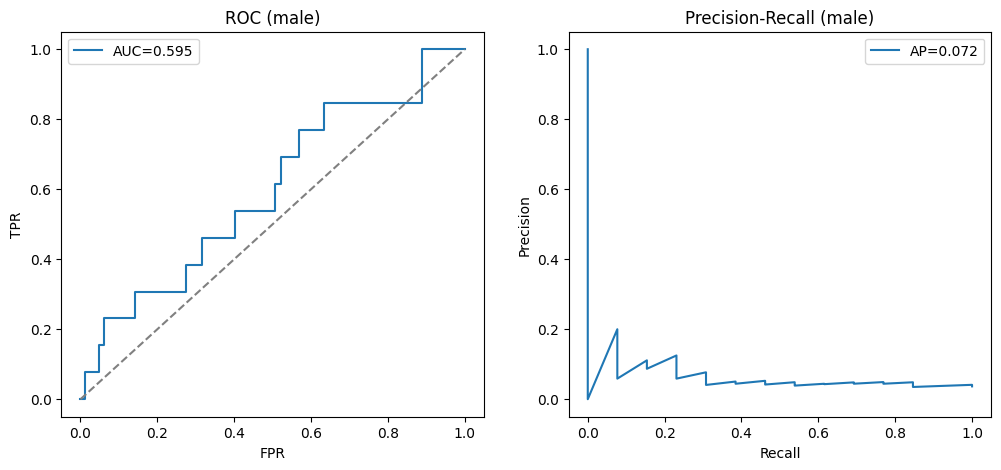

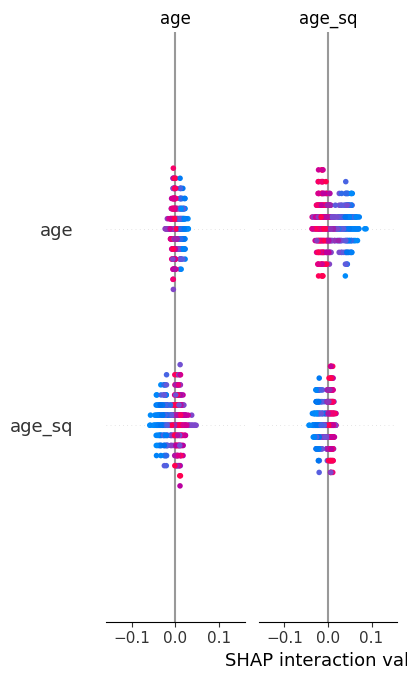

Saved best model pipeline to osteop_model_male_best.pkl

START TRAINING FOR GENDER: FEMALE
Training RandomizedSearchCV for gender=female (RandomForest)...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best RF params: {'clf__n_estimators': 600, 'clf__min_samples_split': 2, 'clf__min_samples_leaf': 4, 'clf__max_features': 0.7, 'clf__max_depth': 6}, best AP: 0.411
Training RandomizedSearchCV for gender=female (XGBoost)...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\omord\PycharmProjects\OsteoporosisScreening\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [00:44:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGB params: {'clf__subsample': 0.6, 'clf__n_estimators': 200, 'clf__max_depth': 6, 'clf__learning_rate': 0.01, 'clf__gamma': 0, 'clf__colsample_bytree': 0.8}, best AP: 0.416
== RandomForest evaluation on test set: AUC=0.717, AP=0.342 ==
== XGBoost evaluation on test set: AUC=0.715, AP=0.329 ==
Selected best: RandomForest
Best threshold by F1 on test: 0.390, F1=0.457
Classification report at selected threshold:
              precision    recall  f1-score   support

           0       0.90      0.65      0.76       253
           1       0.34      0.70      0.46        64

    accuracy                           0.66       317
   macro avg       0.62      0.68      0.61       317
weighted avg       0.78      0.66      0.69       317



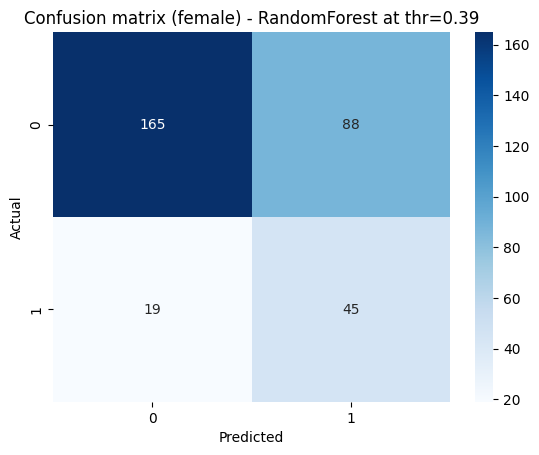

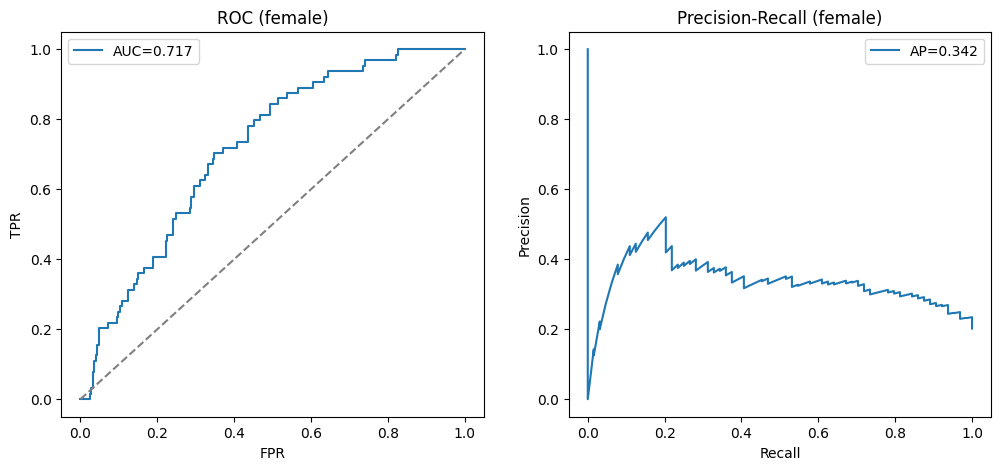

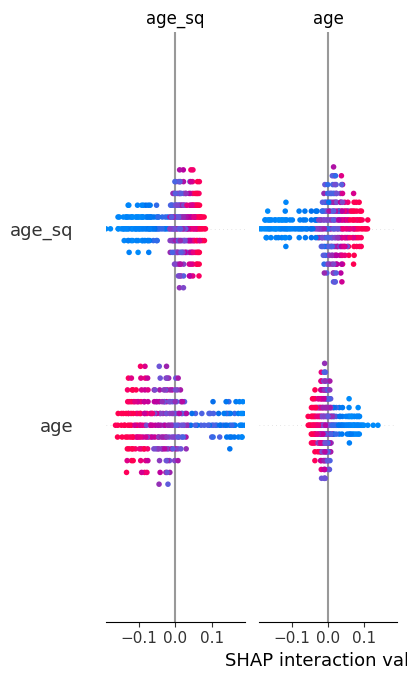

Saved best model pipeline to osteop_model_female_best.pkl

Training completed. Summary reports:
male {'gender': 'male', 'best_model_name': 'RandomForest', 'best_threshold': 0.5733142639877544, 'rf_cv_score': 0.07240725010492083, 'xgb_cv_score': 0.07719825729176251, 'rf_best_params': {'clf__n_estimators': 200, 'clf__min_samples_split': 8, 'clf__min_samples_leaf': 2, 'clf__max_features': 'log2', 'clf__max_depth': 4}, 'xgb_best_params': {'clf__subsample': 0.6, 'clf__n_estimators': 600, 'clf__max_depth': 4, 'clf__learning_rate': 0.03, 'clf__gamma': 0.1, 'clf__colsample_bytree': 0.6}}
female {'gender': 'female', 'best_model_name': 'RandomForest', 'best_threshold': 0.38958994639459943, 'rf_cv_score': 0.41122626087935343, 'xgb_cv_score': 0.4159929209380505, 'rf_best_params': {'clf__n_estimators': 600, 'clf__min_samples_split': 2, 'clf__min_samples_leaf': 4, 'clf__max_features': 0.7, 'clf__max_depth': 6}, 'xgb_best_params': {'clf__subsample': 0.6, 'clf__n_estimators': 200, 'clf__max_depth': 6,

In [63]:
# ---- 3. Train male and female models ----
models = {}
reports = {}

for g in ['male', 'female']:
    print("\n" + "="*60)
    print(f"START TRAINING FOR GENDER: {g.upper()}")
    try:
        m, r = train_gender_model(df, g, save_prefix='osteop_model', random_state=42)
        models[g] = m
        reports[g] = r
    except Exception as e:
        print(f"Failed for gender={g}: {e}")

# Print short reports
print("\nTraining completed. Summary reports:")
for g, r in reports.items():
    print(g, r)